## <a id='table of contents'>СОДЕРЖАНИЕ</a>  
<a href='#part1'>1. ПОСТАНОВКА ЗАДАЧИ</a>     
<a href='#part2'>2. ЗАГРУЗКА И ОПИСАНИЕ ДАННЫХ</a>    
<a href='#part3'>3. ПРЕДОБРАБОТКА ДАННЫХ</a>    
<a href='#part4'>4. ОБУЧЕНИЕ МОДЕЛЕЙ </a>   
<a href='#part5'>5. ПОДГОТОВКА К РАСЧЕТУ ПРИБЫЛИ</a>    
<a href='#part6'>6. РАСЧЕТ РИСКОВ И ПРИБЫЛИ</a>     


# <a id='part1'>1. ПОСТАНОВКА ЗАДАЧИ</a>
<a href='#table of contents'>к оглавлению</a>

***Цель:*** Обучить модель логистической регресси для определения региона в котором добыча нефти принесёт наибольшую прибыль.   

# <a id='part2'> 2. ЗАГРУЗКА И ОПИСАНИЕ ДАННЫХ</a>
<a href='#table of contents'>к оглавлению</a>

### Признаки ###
***id*** — уникальный идентификатор скважины;  
***f0, f1, f2*** — характеристики скважин; 
### Целевой признак###
***product*** — объём запасов в скважине (тыс. баррелей)

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from scipy import stats as st

try:
    df1=pd.read_csv('geo_data_0.csv', sep=',')
    df2=pd.read_csv('geo_data_1.csv', sep=',')
    df3=pd.read_csv('geo_data_2.csv', sep=',')
except: 
    df1=pd.read_csv('/datasets/geo_data_0.csv', sep=',')
    df2=pd.read_csv('/datasets/geo_data_1.csv', sep=',')
    df3=pd.read_csv('/datasets/geo_data_2.csv', sep=',')

Выведем начальную информацию о данных

In [2]:
df_sum=[df1,df2,df3]

In [3]:
for i in df_sum: 
    display(i.head())
    display(i.info())
    display(i.describe())
    display(i.nunique())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


id          99990
f0         100000
f1         100000
f2         100000
product    100000
dtype: int64

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


id          99996
f0         100000
f1         100000
f2         100000
product        12
dtype: int64

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


id          99996
f0         100000
f1         100000
f2         100000
product    100000
dtype: int64

Исследуем столбец product из df2 более подробно

In [4]:
print(df2['product'].unique())
print(df2['product'].head(30))
print(df2['product'].value_counts())

[  3.17910258  26.95326103 134.76630516 137.94540774  84.03888568
 110.99214671  53.90652206   0.         107.81304413  57.08562465
  30.13236361  80.85978309]
0       3.179103
1      26.953261
2     134.766305
3     137.945408
4     134.766305
5      84.038886
6     110.992147
7      53.906522
8     134.766305
9     137.945408
10     53.906522
11      0.000000
12    107.813044
13      0.000000
14     84.038886
15      3.179103
16     53.906522
17    134.766305
18     84.038886
19     84.038886
20    110.992147
21    134.766305
22    134.766305
23    134.766305
24     53.906522
25     57.085625
26    110.992147
27     26.953261
28    107.813044
29      3.179103
Name: product, dtype: float64
53.906522     8472
26.953261     8468
84.038886     8431
57.085625     8390
3.179103      8337
80.859783     8320
30.132364     8306
134.766305    8304
110.992147    8303
0.000000      8235
137.945408    8233
107.813044    8201
Name: product, dtype: int64


Проверим признаки на мультиколлинеарность

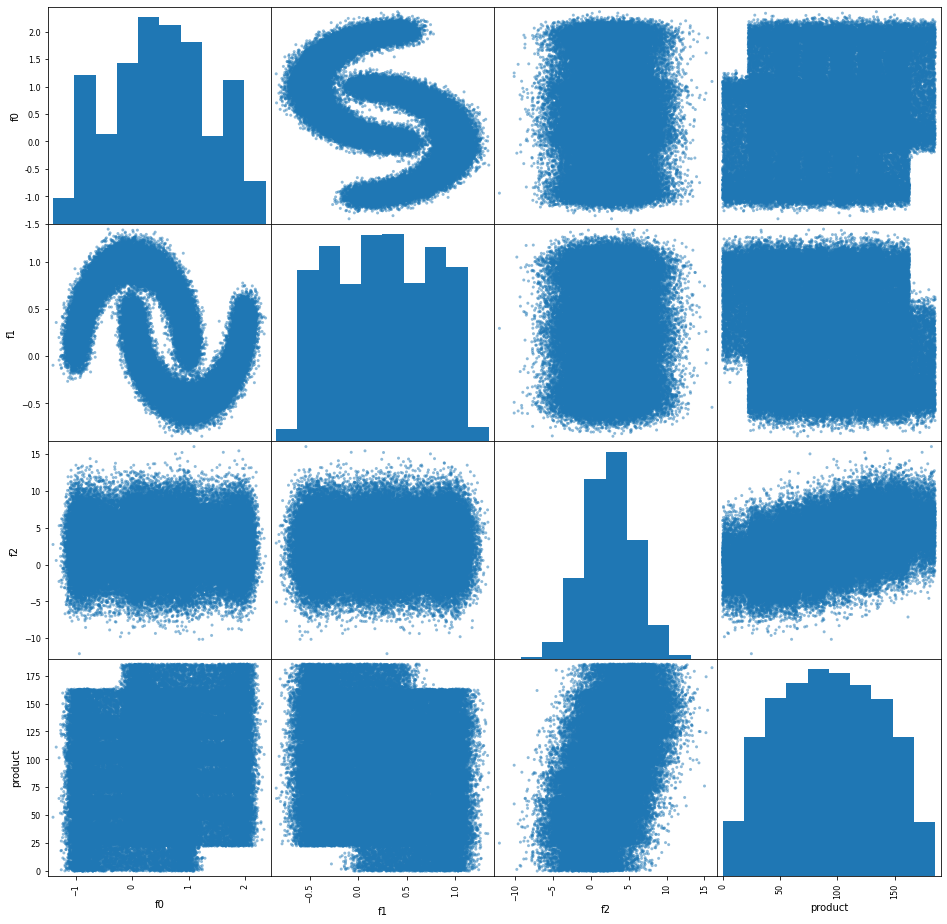

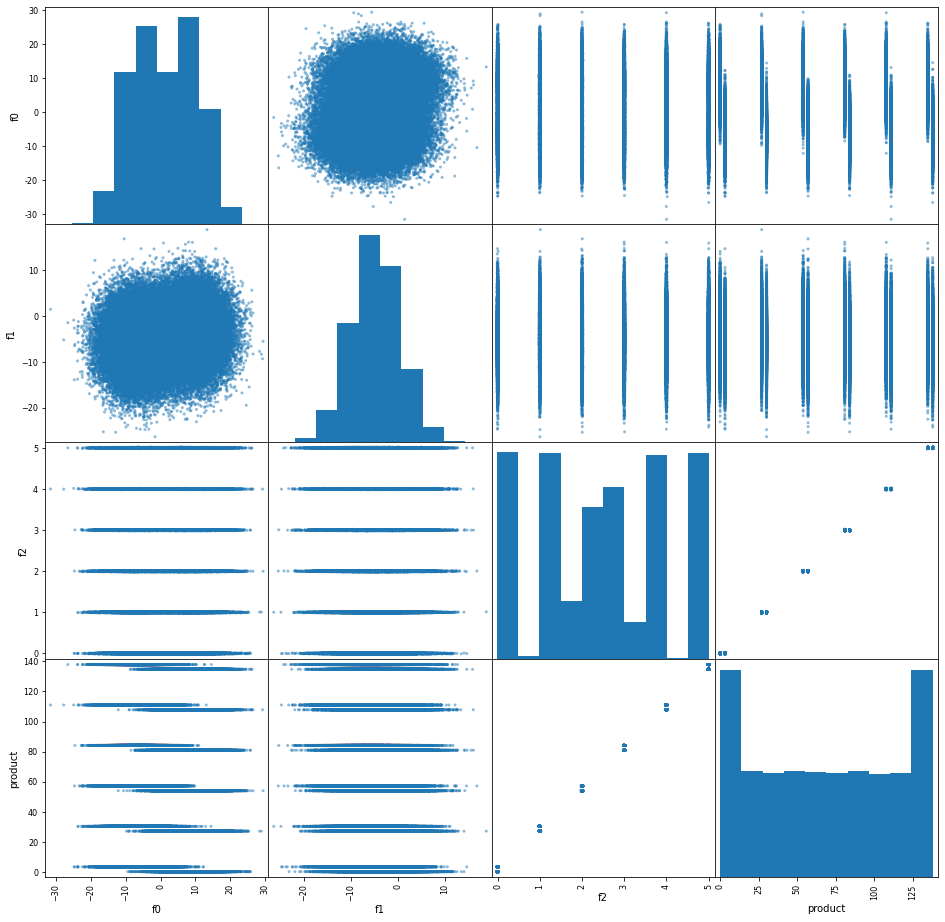

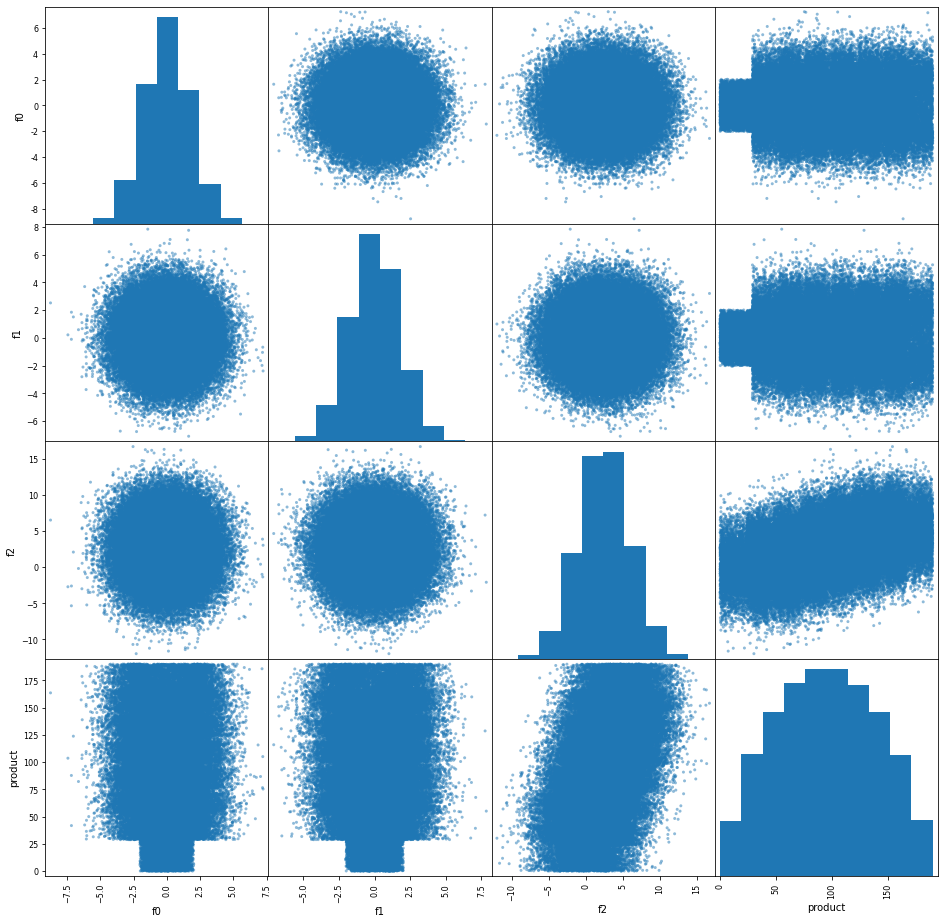

In [5]:
for i in df_sum:
    pd.plotting.scatter_matrix(i, figsize = (16, 16))

### Вывод 1:
***- Данные не имеют пропусков.***  
***- во всех регионах встречаются скважины с одинакомыми id.***  
***- Во втором регионе количество запасов повторяется подозрительно часто, всего 12 уникальных значений***  
***- Корреляции между признаками не обнаружено***  
***- В масштабировании данных нет необходимости***  

# <a id='part3'>3. ПРЕДОБРАБОТКА ДАННЫХ </a>
<a href='#table of contents'>к оглавлению</a>

Удалим столбцы с id скважин 

In [6]:
df1=df1.drop(['id'], axis = 1)
df2=df2.drop(['id'], axis = 1)
df3=df3.drop(['id'], axis = 1)
display(df1.head())
display(df2.head())
display(df3.head())

,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647


,f0,f1,f2,product
0,-15.001348,-8.276000,-0.005876,3.179103
1,14.272088,-3.475083,0.999183,26.953261
2,6.263187,-5.948386,5.001160,134.766305
3,-13.081196,-11.506057,4.999415,137.945408
4,12.702195,-8.147433,5.004363,134.766305


,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27.758673
1,0.262778,0.269839,-2.530187,56.069697
2,0.194587,0.289035,-5.586433,62.871910
3,2.236060,-0.553760,0.930038,114.572842
4,-0.515993,1.716266,5.899011,149.600746


# <a id='part4'> 4. ОБУЧЕНИЕ МОДЕЛЕЙ </a>
<a href='#table of contents'>к оглавлению</a>

Получим данные для обучения

In [7]:
r=42

In [8]:
#создадим функцию для разделения данных
def test_split (data):
    features=data.drop(['product'], axis=1) # определим признаки
    target=data['product'] # определим целевой признак
    # получим обучающую и валидационную выборки
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=.25, random_state=r)
    print('Размеры признаков')
    display(features.shape)
    display(target.shape)
    print('Размеры тренировочной выборки')
    display(features_train.shape)
    display(target_train.shape)
    print('Размеры валидационной выборки')
    display(features_valid.shape)
    display(target_valid.shape)
    return [features_train, target_train, features_valid, target_valid]

Создадим функцию для вычисления запасов

In [9]:
def product_predict(features_train, target_train, features_valid, target_valid):
    model=LinearRegression()
    model.fit(features_train, target_train)
    predicted_valid=model.predict(features_valid)
    score = mean_squared_error(target_valid, predicted_valid)**0.5
    product_mean=predicted_valid.mean()
    print()
    print("RMSE для региона=", score)
    print("Средний запас предсказанного сырья для региона=", product_mean)
    global a
    a=[score, product_mean] # сохраним показатели метрики и среднее количество запасов предсказанного сырья
    global b
    b=[predicted_valid, target_valid] # сохраним предсказанные значения запасов
    return a, b
    

***Рассчитаем показатели для регионов***

Регион №1

In [10]:
region_data_1=test_split(df1) # сохраним данные для обучения
features_train_1, target_train_1, features_valid_1, target_valid_1 = region_data_1[0], region_data_1[1], region_data_1[2], region_data_1[3]
display(features_train_1.head())
display(target_train_1.head())
display(features_valid_1.head())
display(target_valid_1.head())

Размеры признаков


(100000, 3)

(100000,)

Размеры тренировочной выборки


(75000, 3)

(75000,)

Размеры валидационной выборки


(25000, 3)

(25000,)

,f0,f1,f2
98980,1.611925,-0.151874,1.221668
69824,-0.896203,0.369086,-4.537914
9928,0.217569,0.974254,7.369521
75599,0.882945,0.669249,3.114527
95621,-0.941661,0.634162,2.873607


98980    105.179287
69824      9.351083
9928     117.266771
75599    116.537717
95621    110.712818
Name: product, dtype: float64

,f0,f1,f2
75721,0.599283,-0.557623,2.121187
80184,0.739017,-0.463156,-1.347584
19864,1.422743,-0.534917,3.718798
76699,1.580244,-0.238458,2.805149
92991,0.918974,0.023961,2.598575


75721    122.073350
80184     48.738540
19864    131.338088
76699     88.327757
92991     36.959266
Name: product, dtype: float64

In [11]:
product_predict(features_train_1,target_train_1, features_valid_1, target_valid_1) # применим функцию расчета запаса сыр
RMSE_region_1, product_mean_region_1 = a
predicted_product_region_1=b[0]
reall_product_region_1=b[1]
print(predicted_product_region_1)


RMSE для региона= 37.75660035026169
Средний запас предсказанного сырья для региона= 92.39879990657768
[101.90101715  78.21777385 115.26690103 ...  82.54439653  81.82668931
  93.12106221]


Регион №2

In [12]:
region_data_2=test_split(df2) 
features_train_2, target_train_2, features_valid_2, target_valid_2 = region_data_2[0],\
region_data_2[1], region_data_2[2], region_data_2[3]

Размеры признаков


(100000, 3)

(100000,)

Размеры тренировочной выборки


(75000, 3)

(75000,)

Размеры валидационной выборки


(25000, 3)

(25000,)

In [13]:
product_predict(features_train_2, target_train_2, features_valid_2, target_valid_2) 
RMSE_region_2, product_mean_region_2=a
predicted_product_region_2=b[0]
reall_product_region_2=b[1]
print(predicted_product_region_2)


RMSE для региона= 0.8902801001028826
Средний запас предсказанного сырья для региона= 68.71287803913765
[  0.84473806  52.92161194 135.11038454 ...  26.70873415 109.82308735
 135.44878039]


Регион №3

In [14]:
region_data_3=test_split(df3) 
features_train_3, target_train_3, features_valid_3, target_valid_3 = region_data_3[0],\
region_data_3[1], region_data_3[2], region_data_3[3]

Размеры признаков


(100000, 3)

(100000,)

Размеры тренировочной выборки


(75000, 3)

(75000,)

Размеры валидационной выборки


(25000, 3)

(25000,)

In [15]:
product_predict(features_train_3, target_train_3, features_valid_3, target_valid_3) 
RMSE_region_3, product_mean_region_3=a
predicted_product_region_3=b[0]
reall_product_region_3=b[1]
print(predicted_product_region_3)


RMSE для региона= 40.145872311342174
Средний запас предсказанного сырья для региона= 94.77102387765939
[ 98.30191642 101.59246124  52.4490989  ...  64.09839     83.76413542
  86.55864415]


Сводная таблица с предсказанным количеством запасов и RMSE по регионам

In [16]:
data = {'Регионы': ['1', '2', '3'], 
        'RMSE': [RMSE_region_1, RMSE_region_2, RMSE_region_3],
        'Средний запас предсказанного сырья для региона': [product_mean_region_1, product_mean_region_2, product_mean_region_3],
        }
table = pd.DataFrame.from_dict(data)
display(table)

,Регионы,RMSE,Средний запас предсказанного сырья для региона
0,1,37.756600,92.398800
1,2,0.890280,68.712878
2,3,40.145872,94.771024


### Вывод 2: 
***Лушие предсказания для региона 2, что неудивительно, учитывая, что там всего 12 разных значений запасов сырья***

# <a id='part5'> 5. Подготовка к расчету прибыли </a>
<a href='#table of contents'>к оглавлению</a>

Сохраним необходимые значения в отдельных переменных

In [17]:
barrel_revenue=450 # доход от продажи 1 барреля нефти

product_revenue=450000 # доход от продажи 1 проудкта(1 тыс нефти)

region_budget=10000000000  #бюджет на разработку скважин

number_of_wells=200 #количество скважин для разработки в регионе

predicted_product_region_1, predicted_product_region_2, predicted_product_region_3 # предсказанные значения запасов  
                                                            # для регионов 1,2 и 3, соответсвенно
    
reall_product_region_1, reall_product_region_2, reall_product_region_3 # реальные значения запасов ля регионов 1,2 и 3,

one_wall_budget=region_budget/number_of_wells


Рассчитаем достаточный объем запасов

In [18]:
sufficient_product_volume=region_budget/number_of_wells/product_revenue
print("Достаточный объем запасов:", sufficient_product_volume)

Достаточный объем запасов: 111.11111111111111


### Вывод 3: 
***Полученное минимальное значение запасов в скважине превышает средние предсказанные запасы во всех регионах и
следовательно необходимо исследовать все регионы дальше***

# <a id='part6'> 6.  РАСЧЕТ РИСКОВ И ПРИБЫЛИ</a>
<a href='#table of contents'>к оглавлению</a>

***Создадим функцию для расчета прибыли***

In [19]:
def profit_calculate(product_predict, product_reall, wells):
    #отсортируем скважины по убыванию запасов
    product_predict_sort= pd.Series(product_predict).reset_index(drop=True).sort_values(ascending=False)
    #выберем 200 лучших скважин из реальных запасов по значениям предсказанных
    product_reall_selected = (product_reall.reset_index(drop=True))[product_predict_sort.index][:wells]
    #рассчитаем прибыль
    profit=product_reall_selected.sum()*product_revenue - number_of_wells*one_wall_budget
    #перевеедм прибыль в млрд рублей
    profit_billions=profit/1000000000
    return profit_billions


***Рассчитаем прибыль и риски для каждого региона***

Регион 1

In [20]:
state = np.random.RandomState(12345)

In [21]:
# применим технику Bootstrap 
profit_1 = []
for i in range(1000):
    target_subsample = (reall_product_region_1.reset_index(drop=True)).sample(n=500, replace=True, random_state=state)
    probs_subsample = pd.Series(predicted_product_region_1).reset_index(drop=True)[target_subsample.index]
    profit_1.append(profit_calculate(probs_subsample, target_subsample, number_of_wells))
    
profit_1 = pd.Series(profit_1) 

mean_1 = profit_1.mean() # найдем среднюю прибыль
print("Средняя прибыль, млрд руб:", mean_1)

df=len(profit_1)-1 # найдем 95% доверительный интервал
confidence_interval_1 = st.t.interval(0.95, df, profit_1.mean(), profit_1.sem())

print("95%-ый доверительный интервал:", confidence_interval_1)

lower_1 = profit_1.quantile(0.025) # найдем риск убытков
print("2,5% квантиль прибыли:", lower_1)

Средняя прибыль, млрд руб: 0.4062787834244185
95%-ый доверительный интервал: (0.38997838218399583, 0.4225791846648411)
2,5% квантиль прибыли: -0.11774213649486832


Регион 2

In [22]:
# применим технику Bootstrap 
profit_2 = []
for i in range(1000):
    target_subsample = (reall_product_region_2.reset_index(drop=True)).sample(n=500, replace=True, random_state=state)
    probs_subsample = pd.Series(predicted_product_region_2).reset_index(drop=True)[target_subsample.index]
    profit_2.append(profit_calculate(probs_subsample, target_subsample, number_of_wells))

profit_2 = pd.Series(profit_2) 

mean_2 = profit_2.mean() # найдем среднюю прибыль
print("Средняя прибыль, млрд руб:", mean_2)

df=len(profit_2)-1 # найдем 95% доверительный интервал
confidence_interval_2 = st.t.interval(0.95, df, profit_2.mean(), profit_2.sem())

print("95%-ый доверительный интервал:", confidence_interval_2)

lower_2 = profit_2.quantile(0.025) # найдем риск убытков
print("2,5% квантиль прибыли:", lower_2)

Средняя прибыль, млрд руб: 0.44150427759225414
95%-ый доверительный интервал: (0.42886607657186376, 0.4541424786126445)
2,5% квантиль прибыли: 0.03572848928085133


Регион 3

In [23]:
# применим технику Bootstrap 
profit_3 = []
for i in range(1000):
    target_subsample = (reall_product_region_3.reset_index(drop=True)).sample(n=500, replace=True, random_state=state)
    probs_subsample = pd.Series(predicted_product_region_3).reset_index(drop=True)[target_subsample.index]
    profit_3.append(profit_calculate(probs_subsample, target_subsample, number_of_wells))

profit_3 = pd.Series(profit_3) 

mean_3 = profit_3.mean() # найдем среднюю прибыль
print("Средняя прибыль, млрд руб:", mean_3)

df=len(profit_3)-1 # найдем 95% доверительный интервал
confidence_interval_3 = st.t.interval(0.95, df, profit_3.mean(), profit_3.sem())

print("95%-ый доверительный интервал:", confidence_interval_3)

lower_3 = profit_3.quantile(0.025) # найдем риск убытков
print("2,5% квантиль прибыли:", lower_3)

Средняя прибыль, млрд руб: 0.38521319591415215
95%-ый доверительный интервал: (0.36829679581582936, 0.40212959601247494)
2,5% квантиль прибыли: -0.16478516610904434


***Сводная таблица со всеми характеристиками по регионам***

In [24]:
data_2 = {'Регионы': ['1', '2', '3'], 
        'Средняя прибыль, млрд руб:': [mean_1, mean_2, mean_3],
        '95%-ый доверительный интервал:': [confidence_interval_1, confidence_interval_2, confidence_interval_3],
        'Риск убытков': [lower_1, lower_2, lower_3]}
table_2 = pd.DataFrame.from_dict(data_2)
display(table_2)

,Регионы,"Средняя прибыль, млрд руб:",95%-ый доверительный интервал:,Риск убытков
0,1,0.406279,"(0.38997838218399583, 0.4225791846648411)",-0.117742
1,2,0.441504,"(0.42886607657186376, 0.4541424786126445)",0.035728
2,3,0.385213,"(0.36829679581582936, 0.40212959601247494)",-0.164785


### Основной вывод: 
***Исходя из данныз таблицы регион с наибольшей вероятной средней прибылью и наименьшим риском убытков - второй, следовательно его нужно рекомендовать для разработки***

In [14]:
A=np.array([[1,2,3],[4,5,5],[1,2,3]])
B=np.array([[1,2],[4,5],[1,1]])
C=A@B
print(A)
print(B)
print(C)

[[1 2 3]
 [4 5 5]
 [1 2 3]]
[[1 2]
 [4 5]
 [1 1]]
[[12 15]
 [29 38]
 [12 15]]
